# 04. Oil Price Analysis and Green construction


- 셀리니움 설치
- 셀프 주유소가 저렴한지 확인할 수 있을까?

#### Beautiful Soup만으로 해결할 수 없는 것
- 접근할 웹 주소를 알 수 없을 때
- 자바스크립트를 사용하는 웹페이지의 경우
- 웹 브라우저로 접근하지 않으면 안될 때

#### Selenium:
- 웹 브라우저를 원격 조작하는 도구
- 자동으로 URL을 열고 클릭 등이 가능
- 스크롤, 문자의 입력, 화면 캡처 등등
- Selenium은 Python모듈도 설치하고 크롬 드라이버도 받아야 한다
- conda install selenium
- 크롬 버전 확인(크롬 오른쪽 상단 -> Chrome 맞춤설정 및 제어 선택 -> 도움말 -> Chrome 정보) # 94.0

## 셀레니움 기초

#### 셀레니움을 이용해서 처음으로 접근해보기

In [1]:
from selenium import webdriver

driver = webdriver.Chrome('C:/Users/고선욱/Documents/ds_study/driver/chromedriver.exe')
driver.get('https://pinkwink.kr/')

- 크롬드라이버 실행
- webdriver.Chrome 명령으로 크롬 드라이버의 경로 지정
- get 명령으로 접근하고 싶은 주소 지정
- 새로운 크롬이 나타나면서 지정된 웹 주소에 접근함

#### 스크롤 가능한 높이를 가져오자(현재 스크롤 가능한 길이)

In [2]:
last_height = driver.execute_script('return document.body.scrollHeight')
last_height

2643

#### 화면 스크롤(화면이 제일 하단으로 내려간다)

In [3]:
driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')

#### 화면 페이지를 지정하는 지점의 xpath를 찾자

- //*[@id="paging"]/ul

#### 찾은 xpath 지점까지 스크롤하는 코드

In [4]:
from selenium.webdriver import ActionChains

some_tag = driver.find_element_by_xpath('''//*[@id="paging"]/ul''')

action = ActionChains(driver)
action.move_to_element(some_tag).perform()

#### id로 찾기

<input autocomplete="off" type="text" size="10" class="gsc-input" name="search" title="검색" id="gsc-i-id1" dir="ltr" spellcheck="false" style="width: 100%; padding: 0px; border: none; margin: 0px; height: auto; background: url(&quot;https://www.google.com/cse/static/images/1x/ko/branding.png&quot;) left center no-repeat rgb(255, 255, 255); outline: none;">

#### 입력 창에 글자 넣기

In [5]:
some_tag = driver.find_element_by_id('''gsc-i-id1''')
some_tag.send_keys('data science') # 검색창에 data science를 입력, 로그인 정보에 많이 응용된다

#### 검색 버튼을 찾는다
- id가 안보이기 때문에 copy xpath로
- //*[@id="___gcse_0"]/div/form/table/tbody/tr/td[2]/button

#### 버튼을 클릭하는 코드 실행

In [6]:
xpath = '''//*[@id="___gcse_0"]/div/form/table/tbody/tr/td[2]/button'''
some_tag = driver.find_element_by_xpath(xpath).click() # .click(): 클릭가능한 link나 button

#### 현재 화면의 html 코드 가져오기

In [7]:
from bs4 import BeautifulSoup

req = driver.page_source # 현재 드라이버에 떠있는 창의 html 소스코드
soup = BeautifulSoup(req, 'html.parser')

#### 광고를 제외한 검색결과(전체)가 나타나는 태그를 찾거나, 검색결과 하나하나를 의미하는 태그를 찾을 수 있음

<div class="gsc-webResult gsc-result"><div class="gs-webResult gs-result"><div class="gsc-thumbnail-inside"><div class="gs-title"><a class="gs-title" href="https://pinkwink.kr/1286" target="_blank" dir="ltr" data-cturl="https://www.google.com/url?client=internal-element-cse&amp;cx=partner-pub-2982459700139266:1067827452&amp;q=https://pinkwink.kr/1286&amp;sa=U&amp;ved=2ahUKEwj9xtrEp6vzAhUNL6YKHdJbAv4QFnoECAQQAQ&amp;usg=AOvVaw0o2VBxmPMq0ewjYW1K66A4" data-ctorig="https://pinkwink.kr/1286">[Data Science] Conda 환경을 만들고 기초 모듈 설치하기 - PinkWink</a></div></div><div class="gsc-url-top"><div class="gs-bidi-start-align gs-visibleUrl gs-visibleUrl-short" dir="ltr">pinkwink.kr</div><div class="gs-bidi-start-align gs-visibleUrl gs-visibleUrl-long" dir="ltr" style="word-break:break-all;">https://pinkwink.kr/1286</div><div class="gs-bidi-start-align gs-visibleUrl gs-visibleUrl-breadcrumb"><span>PinkWink</span><span> › ...</span></div></div><div class="gsc-table-result"><div class="gsc-table-cell-thumbnail gsc-thumbnail"><div class="gs-image-box gs-web-image-box gs-web-image-box-landscape"><a class="gs-image" href="https://pinkwink.kr/1286" target="_blank" data-cturl="https://www.google.com/url?client=internal-element-cse&amp;cx=partner-pub-2982459700139266:1067827452&amp;q=https://pinkwink.kr/1286&amp;sa=U&amp;ved=2ahUKEwj9xtrEp6vzAhUNL6YKHdJbAv4QFnoECAQQAQ&amp;usg=AOvVaw0o2VBxmPMq0ewjYW1K66A4" data-ctorig="https://pinkwink.kr/1286"><img class="gs-image" src="https://encrypted-tbn3.gstatic.com/images?q=tbn:ANd9GcToZrtmpTJ6zux2_ttRkuy-_ugZXLDwvTXDqMD9QJ91q7Jll8k4SJ05byI" alt="미리보기 이미지"></a></div></div><div class="gsc-table-cell-snippet-close"><div class="gs-title gsc-table-cell-thumbnail gsc-thumbnail-left"><a class="gs-title" href="https://pinkwink.kr/1286" target="_blank" dir="ltr" data-cturl="https://www.google.com/url?client=internal-element-cse&amp;cx=partner-pub-2982459700139266:1067827452&amp;q=https://pinkwink.kr/1286&amp;sa=U&amp;ved=2ahUKEwj9xtrEp6vzAhUNL6YKHdJbAv4QFnoECAQQAQ&amp;usg=AOvVaw0o2VBxmPMq0ewjYW1K66A4" data-ctorig="https://pinkwink.kr/1286">[Data Science] Conda 환경을 만들고 기초 모듈 설치하기 - PinkWink</a></div><div class="gs-bidi-start-align gs-snippet" dir="ltr">Python의 다양한 버전과 또 엄청~ 다양한 모듈들의 버전과 그들 사이의 관계들로 (모듈을 포함해서) 파이썬을 설치하는 경우의 수가 아주 많이 생길&nbsp;...</div><div class="gsc-url-bottom"><div class="gs-bidi-start-align gs-visibleUrl gs-visibleUrl-short" dir="ltr">pinkwink.kr</div><div class="gs-bidi-start-align gs-visibleUrl gs-visibleUrl-long" dir="ltr" style="word-break:break-all;">https://pinkwink.kr/1286</div></div><div class="gs-richsnippet-box" style="display: none;"></div><div class="gs-per-result-labels" url="https://pinkwink.kr/1286"></div></div></div></div><div class="gs-watermark"><a href="http://code.google.com/apis/ajaxsearch/faq.html" class="gs-watermark" target="_blank">Google에서 발췌 - 10/2021</a></div></div>

#### 이렇게 접근이 가능함

In [8]:
result = soup.find_all('div', 'gsc-webResult gsc-result')
result[0]

<div class="gsc-webResult gsc-result"><div class="gs-webResult gs-result"><div class="gsc-thumbnail-inside"><div class="gs-title"><a class="gs-title" data-ctorig="https://pinkwink.kr/1286" data-cturl="https://www.google.com/url?client=internal-element-cse&amp;cx=partner-pub-2982459700139266:1067827452&amp;q=https://pinkwink.kr/1286&amp;sa=U&amp;ved=2ahUKEwj9xtrEp6vzAhUNL6YKHdJbAv4QFnoECAQQAQ&amp;usg=AOvVaw0o2VBxmPMq0ewjYW1K66A4" dir="ltr" href="https://pinkwink.kr/1286" target="_blank">[Data Science] Conda 환경을 만들고 기초 모듈 설치하기 - PinkWink</a></div></div><div class="gsc-url-top"><div class="gs-bidi-start-align gs-visibleUrl gs-visibleUrl-short" dir="ltr">pinkwink.kr</div><div class="gs-bidi-start-align gs-visibleUrl gs-visibleUrl-long" dir="ltr" style="word-break:break-all;">https://pinkwink.kr/1286</div><div class="gs-bidi-start-align gs-visibleUrl gs-visibleUrl-breadcrumb"><span>PinkWink</span><span> › ...</span></div></div><div class="gsc-table-result"><div class="gsc-table-cell-thumbna

## 데이터 확보를 위한 작업
- https://www.opinet.co.kr/user/main/mainView.do
- 대한민국 주유 가격을 알아보는 사이트

### 사이트 구조 분석
- 싼 주유소 찾기에서 지역별 선택
- https://www.opinet.co.kr/searRgSelect.do
- 사이트 구조 확인
- 목표 데이터는 브랜드, 가격, 셀프 주유 여부, 위치
- 지역에서 광역시도와 시구 정보를 입력
- 지도가 바뀌고, 또 잠시 후 주유소 정보가 로딩
- 셀프여부를 알려주고 있고, 휘발유 가격도 있다 (상표와 주소 정보를 다루기가 까다로울 것 같음)
- 엑셀파일에는 원하는 정보가 모두 존재한다
- 서울 => 각 구를 번갈아 선택
- 엑셀파일을 다운로드 받아, 다운로드 받은 엑셀 분석
- 지역을 선택해도 드러난 웹 주소가 변경되지 않는다
- 생각보다는 HTML 소스에서 원하는 정보를 얻는 것도 쉬워보이지 않는다
- Beautiful Soup으로는 바로 접근하기 어려워 보인다

### 주유 가격을 확인해보자

In [9]:
from selenium import webdriver

driver = webdriver.Chrome('C:/Users/고선욱/Documents/ds_study/driver/chromedriver.exe')
driver.get('http://www.opinet.co.kr')

- Selenium에서, Chrome Driver를 이용해서, 원하는 웹 주소로 접근한다

In [10]:
driver.get('http://www.opinet.co.kr/searRgSelect.do')

- 주유 가격 정보 사이트인 Opinet은 지도 정보를 가지고 있어서 충분한 시간적 여유를 주어야 한다
- 간혹 페이지가 전환이 않는 경우가 있다 
- 이 주소를 한번 더 실행

#### 먼저 광역시도를 선택하는 곳 부터

- id가 있다면 편하다
- id = "SIDO_NM0"

In [22]:
sido_list_raw = driver.find_element_by_id("SIDO_NM0")
sido_list_raw

<selenium.webdriver.remote.webelement.WebElement (session="2f86a266352eb29995f4175b4441936e", element="67dfdabc-f5b0-4085-b33c-321f24a939c7")>

- find_element_by_id("SIDO_NM0")로 찾았지만 기대한 결과가 나오지 않는다

In [23]:
sido_list = sido_list_raw.find_elements_by_tag_name("option")
sido_list

[<selenium.webdriver.remote.webelement.WebElement (session="2f86a266352eb29995f4175b4441936e", element="30f81830-8f2c-4bc3-b7f7-235713ce5815")>,
 <selenium.webdriver.remote.webelement.WebElement (session="2f86a266352eb29995f4175b4441936e", element="cbbf734a-2574-41c5-adcd-af57f38455d9")>,
 <selenium.webdriver.remote.webelement.WebElement (session="2f86a266352eb29995f4175b4441936e", element="4edb4f78-b173-49d5-bb7e-d82048289eff")>,
 <selenium.webdriver.remote.webelement.WebElement (session="2f86a266352eb29995f4175b4441936e", element="e9a035d2-fb64-4638-8fa1-b60a6dd291be")>,
 <selenium.webdriver.remote.webelement.WebElement (session="2f86a266352eb29995f4175b4441936e", element="fc46205f-c5a8-43ff-a6eb-e540fdd8322f")>,
 <selenium.webdriver.remote.webelement.WebElement (session="2f86a266352eb29995f4175b4441936e", element="4f5cc24f-2a9c-409b-ae8c-e71c747e1409")>,
 <selenium.webdriver.remote.webelement.WebElement (session="2f86a266352eb29995f4175b4441936e", element="e1a626eb-a4dc-4999-9b5d-dd

- 뭔가 있긴 한데 한글이 보이지 않는다

In [24]:
sido_names = [option.get_attribute("value") for option in sido_list]
sido_names.remove("")
sido_names

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

- 지역 리스트를 가져올 수 있다
- 값은 얻어 왔는데 지역박스의 내용을 바꾸어야 한다
- 애초 박스의 id는 SIDO_NM0 였고, driver에서 해당 id를 sido_list_raw 변수로 저장했었다

In [25]:
sido_list_raw.send_keys(sido_names[1])

- sido_list_raw 변수에 리스트 결과값을 저장한 sido_names
- sido_names의 값을 send_keys를 이용해서 보내면 된다
- 0은 서울, 1은 부산, 2는 대구...16은 제주

In [26]:
sido_list_raw.send_keys(sido_names[0])

- 우리는 서울이 관심사이니, 서울로 고정하자

In [27]:
gu_list_raw = driver.find_element_by_id('SIGUNGU_NM0')
gu_list = gu_list_raw.find_elements_by_tag_name('option')

gu_names = [option.get_attribute('value') for option in gu_list]
gu_names.remove('')
gu_names

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

- option에서 리스트안의 변수값들을 저장하자

In [28]:
gu_list_raw.send_keys(gu_names[1])

- send_keys(gu_names[num]) 로 해당 값을 변경해보자
- 0: 강남구, 1: 강동구...
- 엑셀저장 태그 id 값 확인
- id = 'glopopd_excel'

In [29]:
element_get_excel = driver.find_element_by_id('glopopd_excel').click()

- 하나의 시와 구를 선택해서 엑셀 파일 저장까지 되는지 테스트

In [31]:
import time
from tqdm import tqdm_notebook

for gu in tqdm_notebook(gu_names):
    element = driver.find_element_by_id('SIGUNGU_NM0')
    element.send_keys(gu)
    time.sleep(2) # 너무 빨리 사이트를 액세스하면 미처 갱신되지 않았는데 접근해서 에러가 날 수 있다
    
    element_get_excel = driver.find_element_by_id('glopopd_excel').click()
    time.sleep(1)

C:\Users\고선욱\AppData\Local\Temp/ipykernel_214460/2545666265.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for gu in tqdm_notebook(gu_names):


  0%|          | 0/25 [00:00<?, ?it/s]

- 반복문으로 모든 구의 데이터를 엑셀 파일로 저장
- 다운로드 폴더에 25개의 엑셀파일이 있어야 한다
- 25개가 정상적으로 있다면 ds_study - data 폴더에 넣어주자
- 엑셀 파일을 열어보면 이렇게 정리되어 있다
- 지역, 상호, 주소, 상표, 전화번호, 셀프여부, 종류

In [32]:
driver.close()

- 모든 작업이 끝나면 반드시 driver.close()를 해주자

## 데이터 정리하기

### 데이터 읽어오기

In [1]:
import pandas as pd
from glob import glob

In [2]:
glob('C:/Users/고선욱/Documents/ds_study/data/지역_*.xls')

['C:/Users/고선욱/Documents/ds_study/data\\지역_위치별(주유소) (1).xls',
 'C:/Users/고선욱/Documents/ds_study/data\\지역_위치별(주유소) (10).xls',
 'C:/Users/고선욱/Documents/ds_study/data\\지역_위치별(주유소) (11).xls',
 'C:/Users/고선욱/Documents/ds_study/data\\지역_위치별(주유소) (12).xls',
 'C:/Users/고선욱/Documents/ds_study/data\\지역_위치별(주유소) (13).xls',
 'C:/Users/고선욱/Documents/ds_study/data\\지역_위치별(주유소) (14).xls',
 'C:/Users/고선욱/Documents/ds_study/data\\지역_위치별(주유소) (15).xls',
 'C:/Users/고선욱/Documents/ds_study/data\\지역_위치별(주유소) (16).xls',
 'C:/Users/고선욱/Documents/ds_study/data\\지역_위치별(주유소) (17).xls',
 'C:/Users/고선욱/Documents/ds_study/data\\지역_위치별(주유소) (18).xls',
 'C:/Users/고선욱/Documents/ds_study/data\\지역_위치별(주유소) (19).xls',
 'C:/Users/고선욱/Documents/ds_study/data\\지역_위치별(주유소) (2).xls',
 'C:/Users/고선욱/Documents/ds_study/data\\지역_위치별(주유소) (20).xls',
 'C:/Users/고선욱/Documents/ds_study/data\\지역_위치별(주유소) (21).xls',
 'C:/Users/고선욱/Documents/ds_study/data\\지역_위치별(주유소) (22).xls',
 'C:/Users/고선욱/Documents/ds_study/data\\지역_위치별(주유소) (23).

- 파일 목록을 한 번에 가져올 수 있다

In [3]:
stations_files = glob('C:/Users/고선욱/Documents/ds_study/data/지역_*.xls')
stations_files

['C:/Users/고선욱/Documents/ds_study/data\\지역_위치별(주유소) (1).xls',
 'C:/Users/고선욱/Documents/ds_study/data\\지역_위치별(주유소) (10).xls',
 'C:/Users/고선욱/Documents/ds_study/data\\지역_위치별(주유소) (11).xls',
 'C:/Users/고선욱/Documents/ds_study/data\\지역_위치별(주유소) (12).xls',
 'C:/Users/고선욱/Documents/ds_study/data\\지역_위치별(주유소) (13).xls',
 'C:/Users/고선욱/Documents/ds_study/data\\지역_위치별(주유소) (14).xls',
 'C:/Users/고선욱/Documents/ds_study/data\\지역_위치별(주유소) (15).xls',
 'C:/Users/고선욱/Documents/ds_study/data\\지역_위치별(주유소) (16).xls',
 'C:/Users/고선욱/Documents/ds_study/data\\지역_위치별(주유소) (17).xls',
 'C:/Users/고선욱/Documents/ds_study/data\\지역_위치별(주유소) (18).xls',
 'C:/Users/고선욱/Documents/ds_study/data\\지역_위치별(주유소) (19).xls',
 'C:/Users/고선욱/Documents/ds_study/data\\지역_위치별(주유소) (2).xls',
 'C:/Users/고선욱/Documents/ds_study/data\\지역_위치별(주유소) (20).xls',
 'C:/Users/고선욱/Documents/ds_study/data\\지역_위치별(주유소) (21).xls',
 'C:/Users/고선욱/Documents/ds_study/data\\지역_위치별(주유소) (22).xls',
 'C:/Users/고선욱/Documents/ds_study/data\\지역_위치별(주유소) (23).

- 파일명 저장

In [4]:
tmp = pd.read_excel(stations_files[0], header=2)
tmp.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),현대오일뱅크,02-487-2030,Y,-,1648,1448,-
1,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,1693,1487,-
2,서울특별시,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),GS칼텍스,02-426-5372,Y,-,1712,1512,-
3,서울특별시,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),현대오일뱅크,02-3428-1739,Y,1939,1719,1519,-
4,서울특별시,방아다리주유소,서울 강동구 동남로 811 (명일동),SK에너지,02-442-5145,Y,-,1720,1520,-


- 먼저 하나를 읽어본다

In [5]:
tmp_raw = []

for file_name in stations_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)

station_raw = pd.concat(tmp_raw)

- 형식이 동일하고 연달아 붙이기만 하면 될 때는 concat 명령을 사용한다

In [6]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 0 to 37
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      478 non-null    object
 1   상호      478 non-null    object
 2   주소      478 non-null    object
 3   상표      478 non-null    object
 4   전화번호    478 non-null    object
 5   셀프여부    478 non-null    object
 6   고급휘발유   478 non-null    object
 7   휘발유     478 non-null    object
 8   경유      478 non-null    object
 9   실내등유    478 non-null    object
dtypes: object(10)
memory usage: 41.1+ KB


In [7]:
station_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),현대오일뱅크,02-487-2030,Y,-,1648,1448,-
1,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,1693,1487,-
2,서울특별시,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),GS칼텍스,02-426-5372,Y,-,1712,1512,-
3,서울특별시,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),현대오일뱅크,02-3428-1739,Y,1939,1719,1519,-
4,서울특별시,방아다리주유소,서울 강동구 동남로 811 (명일동),SK에너지,02-442-5145,Y,-,1720,1520,-


### 데이터 편집하기

In [9]:
stations = pd.DataFrame(
    {
        '상호': station_raw['상호'],
        '주소': station_raw['주소'],
        '가격': station_raw['휘발유'],
        '셀프': station_raw['셀프여부'],
        '상표': station_raw['상표'],
    }
)
stations.head()

,상호,주소,가격,셀프,상표
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1648,Y,현대오일뱅크
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1693,N,현대오일뱅크
2,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1712,Y,GS칼텍스
3,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1719,Y,현대오일뱅크
4,방아다리주유소,서울 강동구 동남로 811 (명일동),1720,Y,SK에너지


- 원하는 정보만 다듬어보자

In [10]:
stations['구'] = [eachAddress.split()[1] for eachAddress in stations['주소']]
stations.head()

,상호,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1648,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1693,N,현대오일뱅크,강동구
2,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1712,Y,GS칼텍스,강동구
3,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1719,Y,현대오일뱅크,강동구
4,방아다리주유소,서울 강동구 동남로 811 (명일동),1720,Y,SK에너지,강동구


- 평균적으로 주유가격이 비싼 구를 확인하기 위해 주소에서 구 정보를 가져오자

In [11]:
stations['구'].unique()

array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
       '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강남구'], dtype=object)

In [12]:
len(stations['구'].unique())

25

In [16]:
# stations[stations['구'] == '서울특별시']

In [17]:
# stations.loc[stations['구'] == '서울특별시', '구'] = '성동구'
# stations['구'].unique()

In [18]:
# stations[stations['구'] == '특별시']

In [19]:
# stations.loc[stations['구'] == '특별시', '구'] = '도봉구'
# stations['구'].unique()

- 오류를 바로 잡아준다

In [20]:
stations['가격'] = stations['가격'].astype('float')

ValueError: could not convert string to float: '-'

- 가격에 대해 수치적 연산을 하기 위해 float형으로 변경하려 했지만 에러가 났다

In [21]:
stations[stations['가격'] == '-']

,상호,주소,가격,셀프,상표,구
31,현대오일뱅크㈜직영 올림픽셀프주유소,서울 송파구 위례성대로 188 (오금동),-,Y,현대오일뱅크,송파구
27,지에스칼텍스㈜ 화일주유소,서울 영등포구 도림로 415,-,Y,GS칼텍스,영등포구
16,삼융주유소,서울 은평구 수색로 299 (수색동),-,N,SK에너지,은평구
10,지에스칼텍스(주)직영 역전점,서울 중구 퇴계로 15,-,N,GS칼텍스,중구
14,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,-,Y,GS칼텍스,중랑구
15,구의스타주유소,서울 광진구 자양로 103,-,N,GS칼텍스,광진구
14,양지진흥개발(주)상계주유소,서울 노원구 노해로 527 (상계동),-,N,SK에너지,노원구
17,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),-,Y,현대오일뱅크,도봉구
35,학여울주유소,서울 강남구 남부순환로 3170 (일원2동),-,N,GS칼텍스,강남구
36,삼성주유소,서울 강남구 삼성로 521 (삼성동),-,N,SK에너지,강남구


- 가격 정보가 없는 주유소가 있다

In [22]:
stations = stations[stations['가격'] != '-']
stations.head()

,상호,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1648,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1693,N,현대오일뱅크,강동구
2,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1712,Y,GS칼텍스,강동구
3,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1719,Y,현대오일뱅크,강동구
4,방아다리주유소,서울 강동구 동남로 811 (명일동),1720,Y,SK에너지,강동구


- 가격 정보가 있는 데이터만 일단 수집하자

In [23]:
stations['가격'] = stations['가격'].astype('float')

C:\Users\고선욱\AppData\Local\Temp/ipykernel_216312/786094376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations['가격'] = stations['가격'].astype('float')


In [24]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 467 entries, 0 to 34
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상호      467 non-null    object 
 1   주소      467 non-null    object 
 2   가격      467 non-null    float64
 3   셀프      467 non-null    object 
 4   상표      467 non-null    object 
 5   구       467 non-null    object 
dtypes: float64(1), object(5)
memory usage: 25.5+ KB


In [25]:
stations

,상호,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1648.0,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1693.0,N,현대오일뱅크,강동구
2,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1712.0,Y,GS칼텍스,강동구
3,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1719.0,Y,현대오일뱅크,강동구
4,방아다리주유소,서울 강동구 동남로 811 (명일동),1720.0,Y,SK에너지,강동구
...,...,...,...,...,...,...
30,경원주유소,서울 강남구 도산대로 428 (청담동),2125.0,N,S-OIL,강남구
31,SK논현주유소,서울 강남구 논현로 747 (논현동),2155.0,N,SK에너지,강남구
32,(주)소모에너지 쎈트럴주유소,서울 강남구 삼성로 335,2158.0,N,GS칼텍스,강남구
33,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2158.0,N,GS칼텍스,강남구


In [26]:
stations.reset_index(inplace=True)
stations.head()

,index,상호,주소,가격,셀프,상표,구
0,0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1648.0,Y,현대오일뱅크,강동구
1,1,구천면주유소,서울 강동구 구천면로 357 (암사동),1693.0,N,현대오일뱅크,강동구
2,2,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1712.0,Y,GS칼텍스,강동구
3,3,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1719.0,Y,현대오일뱅크,강동구
4,4,방아다리주유소,서울 강동구 동남로 811 (명일동),1720.0,Y,SK에너지,강동구


- index 번호를 다시 매겨준다

In [27]:
del stations['index']
stations.head()

,상호,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1648.0,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1693.0,N,현대오일뱅크,강동구
2,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1712.0,Y,GS칼텍스,강동구
3,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1719.0,Y,현대오일뱅크,강동구
4,방아다리주유소,서울 강동구 동남로 811 (명일동),1720.0,Y,SK에너지,강동구


In [28]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상호      467 non-null    object 
 1   주소      467 non-null    object 
 2   가격      467 non-null    float64
 3   셀프      467 non-null    object 
 4   상표      467 non-null    object 
 5   구       467 non-null    object 
dtypes: float64(1), object(5)
memory usage: 22.0+ KB


## 주유 가격 정보 시각화

### 데이터 시각화

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib import font_manager, rc

path='C:/Windows/Fonts/malgun.ttf'
if platform.system() == 'Darwin':
    rc('font', family='Arial Unicode MS')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...')

- matplotlib 한글 설정

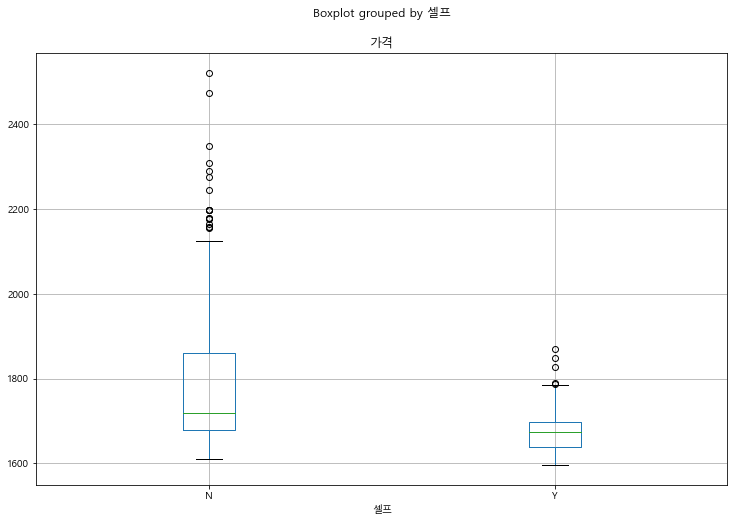

In [32]:
stations.boxplot(column='가격', by='셀프', figsize=(12, 8));

#### Box plot
- Median 중심으로 아래 위 상자가 각각 전체 데이터의 25%씩 총 50%를 가진다
- 상자 전체 길이를 IQR(Inter Quatile Range)라고 한다
- IQR의 1.5배 이상 벗어나면 점으로 별도 표기를 한다

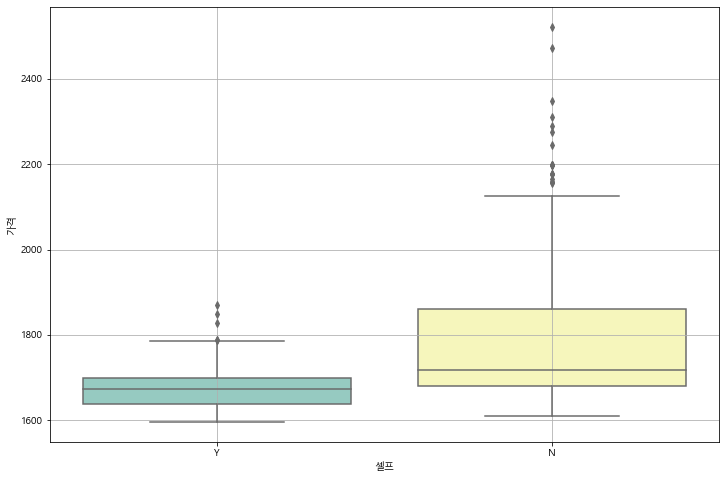

In [33]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='셀프', y='가격', data=stations, palette='Set3')
plt.grid()
plt.show()

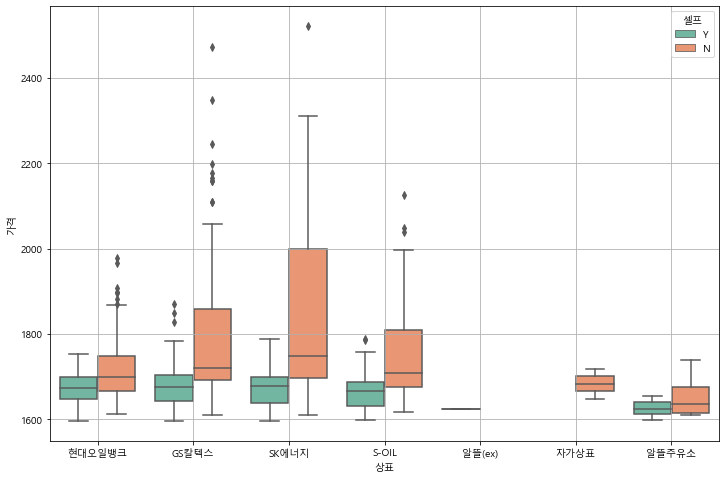

In [34]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='상표', y='가격', hue='셀프', data=stations, palette='Set2' )
plt.grid()
plt.show()

- 각 메이커 별 셀프 주유 여부를 포함해서 가격 분포를 보자 

In [35]:
import json
import folium
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [36]:
stations.sort_values(by='가격', ascending=False).head(10)

,상호,주소,가격,셀프,상표,구
291,서남주유소,서울 중구 통일로 30,2522.0,N,SK에너지,중구
256,서계주유소,서울 용산구 청파로 367 (서계동),2473.0,N,GS칼텍스,용산구
290,필동주유소,서울 중구 퇴계로 196 (필동2가),2349.0,N,GS칼텍스,중구
289,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2310.0,N,SK에너지,중구
255,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2290.0,N,SK에너지,용산구
466,뉴서울(강남),서울 강남구 언주로 716,2275.0,N,SK에너지,강남구
288,약수주유소,서울 중구 다산로 173,2246.0,N,GS칼텍스,중구
254,에너비스,서울 용산구 한남대로 82 (한남동),2198.0,N,SK에너지,용산구
389,구로주유소,서울 구로구 구로동로 137 (구로동),2198.0,N,GS칼텍스,구로구
281,(주)중앙에너비스 혜화주유소,서울 종로구 창경궁로35길 1,2198.0,N,SK에너지,종로구


In [37]:
stations.sort_values(by='가격', ascending=True).head(10)

,상호,주소,가격,셀프,상표,구
16,동서울고속주유소,서울 동대문구 한천로 414,1595.0,Y,SK에너지,동대문구
402,화랑대주유소,서울 노원구 화랑로 483,1595.0,Y,현대오일뱅크,노원구
401,배꽃나라주유소,서울 노원구 화랑로 466 (공릉동),1595.0,Y,GS칼텍스,노원구
205,영등포제일셀프주유소,서울 영등포구 가마산로 379,1598.0,Y,현대오일뱅크,영등포구
207,성락주유소,서울 영등포구 가마산로 414 (신길동),1598.0,Y,S-OIL,영등포구
204,남서울고속주유소,서울 영등포구 가마산로 367 (대림동),1598.0,Y,SK에너지,영등포구
206,도림주유소,서울 영등포구 도림로 343 (도림동),1598.0,Y,알뜰주유소,영등포구
179,(주)타이거오일 신정주유소,서울 양천구 중앙로 226 (신정동),1604.0,Y,SK에너지,양천구
231,수유동주유소,서울 강북구 도봉로 395 (수유동),1608.0,Y,GS칼텍스,강북구
415,삼미북부셀프주유소,서울 도봉구 도봉로 437 (쌍문동),1608.0,Y,SK에너지,도봉구


In [38]:
import numpy as np

gu_data = pd.pivot_table(stations, index=['구'], values=['가격'], aggfunc=np.mean)
gu_data.head()

,가격
구,
강남구,1874.400000
강동구,1770.625000
강북구,1636.076923
강서구,1687.343750
관악구,1719.866667


In [41]:
geo_path = 'C:/Users/고선욱/Documents/ds_study/data/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

my_map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, tiles='Stamen Toner')

my_map.choropleth(
    geo_data=geo_str,
    data=gu_data,
    columns=[gu_data.index, '가격'],
    fill_color='YlGn',
    key_on='feature.id',
)
my_map